<a href="https://colab.research.google.com/github/Bhagya00010/loginpage/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
import matplotlib.pyplot as plt


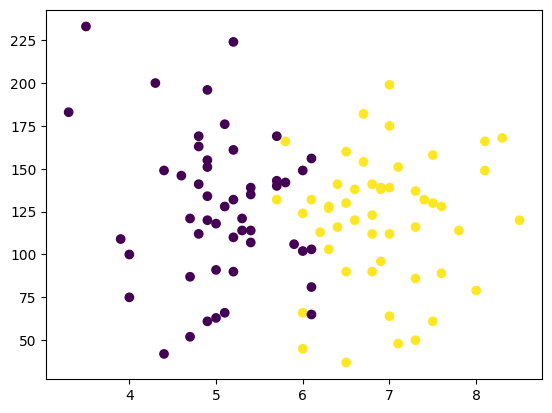

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
25,5.0,91.0
77,7.3,50.0
24,4.7,121.0
36,5.7,140.0
91,7.5,158.0
...,...,...
47,5.2,161.0
86,5.1,128.0
92,5.2,110.0
59,4.8,112.0


In [16]:
y_train

25    0
77    1
24    0
36    0
91    1
     ..
47    0
86    0
92    0
59    0
96    0
Name: placement, Length: 90, dtype: int64

In [17]:
X_test

,cgpa,iq
56,6.1,65.0
7,5.0,63.0
23,4.7,87.0
89,4.9,151.0
22,4.9,120.0
5,7.1,48.0
42,7.6,89.0
32,7.0,139.0
94,4.7,52.0
9,5.1,66.0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-0.89633542, -0.95480527],
       [ 1.12041927, -2.02634767],
       [-1.15939038, -0.17074985],
       [-0.28254051,  0.32581859],
       [ 1.29578924,  0.79625184],
       [ 1.5588442 , -0.35369611],
       [ 0.9450493 ,  0.61330557],
       [-0.01948555, -2.15702358],
       [ 0.50662437,  0.27354822],
       [ 0.41893938, -2.36610502],
       [-0.54559547, -0.35369611],
       [-0.28254051,  0.11673714],
       [ 0.06819943, -0.6411831 ],
       [ 0.24356941, -0.01393876],
       [ 0.24356941,  0.01219642],
       [ 0.85736431,  1.86779424],
       [-0.63328046, -0.17074985],
       [ 0.41893938, -0.98094045],
       [ 0.68199434, -0.11847949],
       [-0.9840204 ,  1.7893887 ],
       [ 1.82189916,  0.56103521],
       [ 0.76967933,  0.27354822],
       [-1.51013032,  1.89392942],
       [-1.07170539,  0.35195377],
       [ 0.41893938,  0.06446678],
       [-0.80865043,  1.26668509],
       [-0.01948555,  0.56103521],
       [ 0.68199434,  0.35195377],
       [ 2.17263911,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.06819943, -1.63431996],
       [-0.89633542, -1.68659032],
       [-1.15939038, -1.05934599],
       [-0.9840204 ,  0.61330557],
       [-0.9840204 , -0.19688503],
       [ 0.9450493 , -2.07861803],
       [ 1.38347423, -1.00707563],
       [ 0.85736431,  0.2996834 ],
       [-1.15939038, -1.97407731],
       [-0.80865043, -1.60818478]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_test

56    0
7     0
23    0
89    0
22    0
5     1
42    1
32    1
94    0
9     0
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.9

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

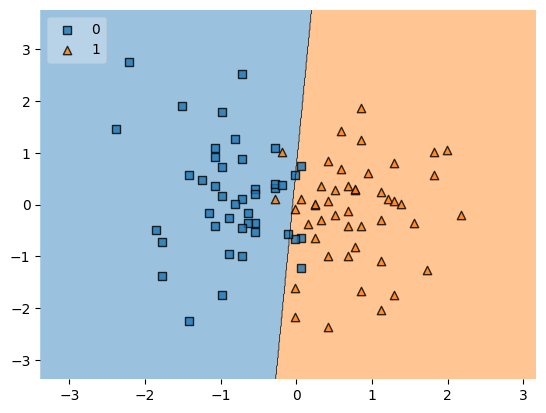

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [33]:
import pickle

In [34]:
pickle.dump(clf,open('model.pkl','wb'))